In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Analisis Exploratorio de Datos

## Carga de la tabla

In [136]:
calls_carga = pd.read_csv('Call_Center_1999.csv',delimiter = ';',encoding = "utf-8")

C:\Users\Carolina\AppData\Local\Temp\ipykernel_27464\1788856173.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  calls_carga = pd.read_csv('Call_Center_1999.csv',delimiter = ';',encoding = "utf-8")


In [137]:
calls_carga

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,17211,0.0,0,IN,1999-12-31,13:46:51,13:47:04,13,0:00:00,0:00:00,0,AGENT,13:47:03,13:56:16,553,Z2ELINOR,334
444444,AA0216,17212,0.0,0,IN,1999-12-31,13:58:31,13:58:40,9,13:58:40,13:59:49,69,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444445,AA0216,17213,0.0,0,IN,1999-12-31,17:10:51,17:11:12,21,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444446,AA0216,17214,0.0,0,IN,1999-12-31,18:30:19,18:30:54,35,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334


## Normalizacion

In [193]:
calls = calls_carga.copy()

In [195]:
calls

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,17211,0.0,0,IN,1999-12-31,13:46:51,13:47:04,13,0:00:00,0:00:00,0,AGENT,13:47:03,13:56:16,553,Z2ELINOR,334
444444,AA0216,17212,0.0,0,IN,1999-12-31,13:58:31,13:58:40,9,13:58:40,13:59:49,69,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444445,AA0216,17213,0.0,0,IN,1999-12-31,17:10:51,17:11:12,21,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444446,AA0216,17214,0.0,0,IN,1999-12-31,18:30:19,18:30:54,35,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334


Se borraron las columnas vru_exit, q_exit, ser_exit, q_start, ser_start y startdate debido a que la informacion que aportaban esta columnas era redundante ya que se puede deducir de otras columnas (vru_entry, vru_time, q_time, ser_time).<br>

In [194]:
calls.drop(columns=['vru_exit', 'q_exit', 'ser_exit', 'q_start', 'ser_start', 'startdate'])

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_time,q_time,outcome,ser_time,server
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,5,153,HANG,0,NO_SERVER
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,11,0,HANG,0,NO_SERVER
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6,17,AGENT,54,MICHAL
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,10,0,AGENT,208,BASCH
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,10,0,AGENT,107,MICHAL
...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,17211,0.0,0,IN,1999-12-31,13:46:51,13,0,AGENT,553,Z2ELINOR
444444,AA0216,17212,0.0,0,IN,1999-12-31,13:58:31,9,69,HANG,0,NO_SERVER
444445,AA0216,17213,0.0,0,IN,1999-12-31,17:10:51,21,0,HANG,0,NO_SERVER
444446,AA0216,17214,0.0,0,IN,1999-12-31,18:30:19,35,0,HANG,0,NO_SERVER


In [192]:
calls

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,17211,0.0,0,IN,1999-12-31,13:46:51,13:47:04,13,0:00:00,0:00:00,0,AGENT,13:47:03,13:56:16,553,Z2ELINOR,334
444444,AA0216,17212,0.0,0,IN,1999-12-31,13:58:31,13:58:40,9,13:58:40,13:59:49,69,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444445,AA0216,17213,0.0,0,IN,1999-12-31,17:10:51,17:11:12,21,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444446,AA0216,17214,0.0,0,IN,1999-12-31,18:30:19,18:30:54,35,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334


Se realizó el cambio de 'priority' de 0, 1 y 2 a "Normal" y "Alta" para identificar con mayor facilidad el nivel de prioridad de cada cliente<br>

In [141]:
calls['priority']=calls['priority'].replace(2,'Alta')
calls['priority']=calls['priority'].replace(1,'Normal')
calls['priority']=calls['priority'].replace(0,'Normal')

Se consideró que los nombres "ANO_SERVERT" y "NO_SERVERAMA" tuvieron un error de ingreso y correspondian a "NO_SERVER" por lo cual se realizó el cambio. Se modificaron 1221 registros.

In [142]:
calls['server']=calls['server'].replace('NO_SERVERAMA','NO_SERVER')
calls['server']=calls['server'].replace('ANO_SERVERT','NO_SERVER')

In [143]:
calls.loc[calls['server']=='NO_SERVERAMA']
calls.loc[calls['server']=='ANO_SERVERT']

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate


Se identificó que se cometió un error al digitar el valor 'TT' en 'type'. Se cambió el valor ' TT' por 'TT'. Se actualizaron 6 registros

In [144]:
calls['type']=calls['type'].replace(' TT','TT')

In [145]:
calls.loc[calls['type']==' TT']

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate


Se borraron los registros de llamadas que tienen los tres campos: vru_time, q_time y ser_time en cero, ya que para el analisis a realizar la variable principal son los tiempos, por lo que no se consideran objeto de estudio y no aportan informacion relevante. 

5390 registros

In [146]:
calls.drop(calls[(calls['q_time']==0)&(calls['ser_time']==0)&(calls['vru_time']==0)].index, inplace=True)

In [147]:
calls

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,Alta,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,Normal,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,Alta,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,Normal,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,Normal,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,17211,0.0,Normal,IN,1999-12-31,13:46:51,13:47:04,13,0:00:00,0:00:00,0,AGENT,13:47:03,13:56:16,553,Z2ELINOR,334
444444,AA0216,17212,0.0,Normal,IN,1999-12-31,13:58:31,13:58:40,9,13:58:40,13:59:49,69,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444445,AA0216,17213,0.0,Normal,IN,1999-12-31,17:10:51,17:11:12,21,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444446,AA0216,17214,0.0,Normal,IN,1999-12-31,18:30:19,18:30:54,35,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334


## Analisis de Outliers en tiempos

### Tiempo en VRU

In [148]:
calls['vru_time'].describe()

count    439058.000000
mean         10.412356
std          35.137258
min        -362.000000
25%           6.000000
50%           8.000000
75%          10.000000
max        4832.000000
Name: vru_time, dtype: float64

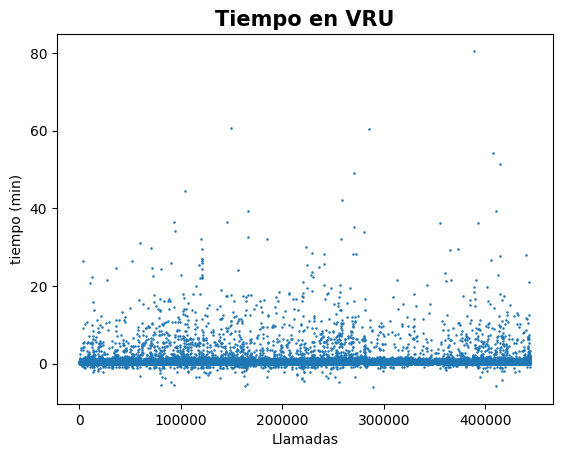

In [149]:
plt.plot(calls['vru_time']/60,'o',markersize=0.8)
plt.title('Tiempo en VRU', fontweight = 'bold',fontsize=15)
plt.xlabel('Llamadas')
plt.ylabel('tiempo (min)')
plt.show()

#### Boxplot

Limites segun el Boxplot: tiempo maximo 16 segundos y minimo 0 segundos <br>

In [150]:
#Calculo de bigotes
Q3 = float(calls['vru_time'].quantile(0.75))
Q1 = float(calls['vru_time'].quantile(0.25))
RIC = Q3 - Q1

Min_vru_bp = Q1 - 1.5*RIC
if Min_vru_bp < min(calls['vru_time']):
    Min_vru_bp = min(calls['vru_time'])
Max_vru_bp = Q3 + 1.5*RIC
if Max_vru_bp > max(calls['vru_time']):
    Max_vru_bp = max(calls['vru_time'])

Min_vru_bp, Max_vru_bp

(0.0, 16.0)

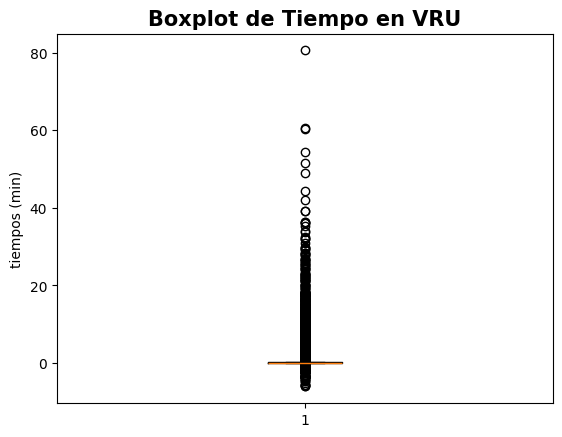

In [151]:
#Box plot completo
plt.boxplot(calls['vru_time']/60)
plt.title('Boxplot de Tiempo en VRU',fontsize=15,fontweight='bold')
plt.ylabel('tiempos (min)')
plt.show()

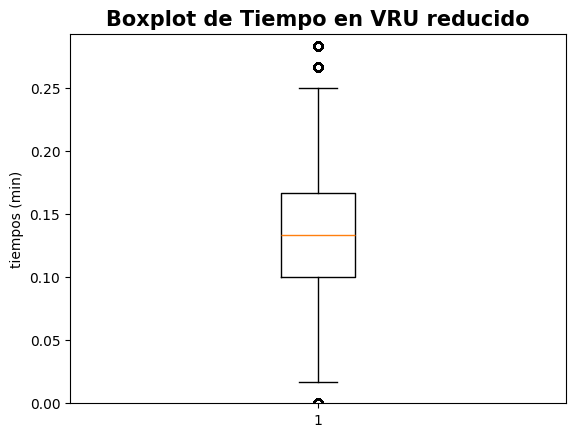

In [152]:
#Box plot enfocado en el box
plt.boxplot(calls['vru_time']/60)
plt.ylim(Min_vru_bp*0.9/60,Max_vru_bp*1.1/60)
plt.title('Boxplot de Tiempo en VRU reducido',fontsize=15,fontweight='bold')
plt.ylabel('tiempos (min)')
plt.show()

#### Sigmas

1 sigma

Limites segun el metodo de 1 sigma: tiempo maximo 45.55 segundos y minimo -24.72 segundos

In [153]:
Max_vru_s1 = calls['vru_time'].mean() + (1 * calls['vru_time'].std())
Min_vru_s1 = calls['vru_time'].mean() - (1 * calls['vru_time'].std())

if Min_vru_s1 < min(calls['vru_time']):
    Min_vru_s1 = min(calls['vru_time'])
if Max_vru_s1 > max(calls['vru_time']):
    Max_vru_s1 = max(calls['vru_time'])

Min_vru_s1, Max_vru_s1

(np.float64(-24.724902039759606), np.float64(45.54961312576646))

2 sigmas

Limites segun el metodo de los 2 sigmas: tiempo maximo 80.69 segundos (1.34 minutos) y minimo -59.86 segundos (aprox -1 minuto)

In [154]:
Max_vru_s2 = calls['vru_time'].mean() + (2 * calls['vru_time'].std())
Min_vru_s2 = calls['vru_time'].mean() - (2 * calls['vru_time'].std())

if Min_vru_s2 < min(calls['vru_time']):
    Min_vru_s2 = min(calls['vru_time'])
if Max_vru_s2 > max(calls['vru_time']):
    Max_vru_s2 = max(calls['vru_time'])

Min_vru_s2, Max_vru_s2

(np.float64(-59.86215962252264), np.float64(80.6868707085295))

3 sigmas

Limites segun el metodo de 1 sigma: tiempo maximo 115.82 segundos (1.93 minutos) y minimo -94.99 segundos (-1.58 minutos)

In [155]:
Max_vru_s3 = calls['vru_time'].mean() + (3 * calls['vru_time'].std())
Min_vru_s3 = calls['vru_time'].mean() - (3 * calls['vru_time'].std())

if Min_vru_s3 < min(calls['vru_time']):
    Min_vru_s3 = min(calls['vru_time'])
if Max_vru_s3 > max(calls['vru_time']):
    Max_vru_s3 = max(calls['vru_time'])

Min_vru_s3, Max_vru_s3

(np.float64(-94.99941720528568), np.float64(115.82412829129254))

#### Conclusion

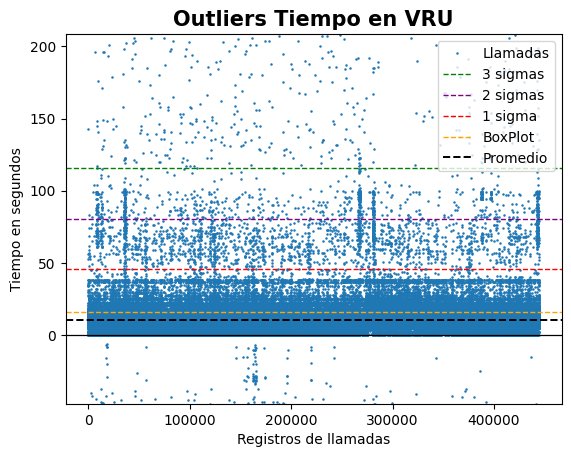

In [156]:
#Grafica de los outliers
plt.plot(calls['vru_time'],'o', markersize = 0.8)
plt.axhline(y=Max_vru_s3, color='green', linestyle='--', lw=1)
plt.axhline(y=Max_vru_s2, color='purple', linestyle='--', lw=1)
plt.axhline(y=Max_vru_s1, color='r', linestyle='--', lw=1)
plt.axhline(y=Max_vru_bp, color='orange', linestyle='--', lw=1)
plt.axhline(y=calls['vru_time'].mean(), color='black', linestyle='--', lw=1.4)
plt.axhline(y=0, color='black', linestyle='-', lw=0.9)
plt.ylim(Min_vru_s3*0.5,Max_vru_s3*1.8)
plt.legend(['Llamadas','3 sigmas','2 sigmas','1 sigma','BoxPlot','Promedio'],loc="upper right")
plt.ylabel('Tiempo en segundos')
plt.xlabel('Registros de llamadas')
plt.title('Outliers Tiempo en VRU',fontsize=15,fontweight='bold')
plt.show()

Despues de utilizar los 4 metodos anteriores para identificar los outliers (el metodo de Box Plot y diferentes sigmas) y teniendo en cuenta los resultados arrojados, se decidió utilizar el método de 1 sigma el cual establece un tiempo maximo de 45.62 segundos debido a que este contiene los tiempos mas representativos de la muestra. Adicionalmente, se observó la existencia de tiempos negativos lo cual no corresponde a la realidad. Con base en lo anterior, se borraron 4913 registros (1.10%) <br>

In [157]:
calls.drop(calls[(calls['vru_time']<0)|(calls['vru_time']>Max_vru_s1)].index,inplace=True)

Quedaron 434145

### Tiempo en Cola

In [158]:
calls['q_time'].describe()

count    434145.000000
mean         60.261383
std         120.448512
min           0.000000
25%           0.000000
50%          17.000000
75%          81.000000
max       28693.000000
Name: q_time, dtype: float64

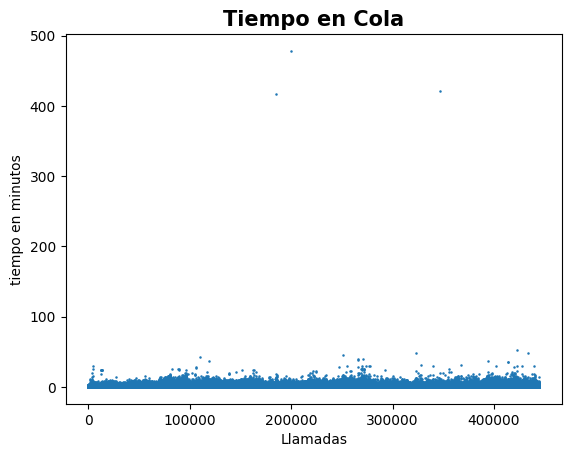

In [159]:
plt.plot(calls['q_time']/60,'o',markersize=0.8)
plt.title('Tiempo en Cola', fontweight = 'bold',fontsize=15)
plt.xlabel('Llamadas')
plt.ylabel('tiempo en minutos')
plt.show()

#### Boxplot

Limites segun el Boxplot: tiempo maximo 202.5 segundos (3.38 minutos) y minimo 0 segundos <br>

In [160]:
#Calculo de bigotes
Q3 = float(calls['q_time'].quantile(0.75))
Q1 = float(calls['q_time'].quantile(0.25))
RIC = Q3 - Q1

Min_q_bp = Q1 - 1.5*RIC
if Min_q_bp < min(calls['q_time']):
    Min_q_bp = min(calls['q_time'])
Max_q_bp = Q3 + 1.5*RIC
if Max_q_bp > max(calls['q_time']):
    Max_q_bp = max(calls['q_time'])

Min_q_bp, Max_q_bp

(0, 202.5)

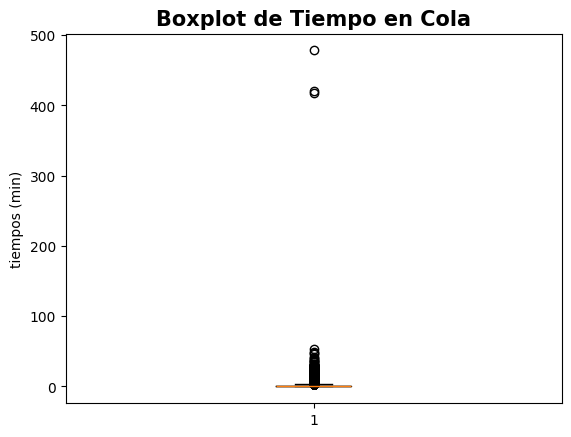

In [161]:
#Box plot 
plt.boxplot(calls['q_time']/60)
plt.title('Boxplot de Tiempo en Cola',fontsize=15,fontweight='bold')
plt.ylabel('tiempos (min)')
plt.show()

(0.0, 3.7125000000000004)

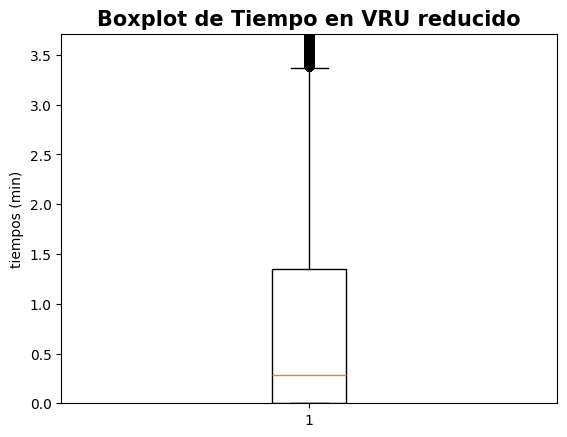

In [162]:
#Box plot enfocado en el box
plt.boxplot(calls['q_time']/60)
plt.title('Boxplot de Tiempo en VRU reducido',fontsize=15,fontweight='bold')
plt.ylabel('tiempos (min)')
plt.ylim(Min_q_bp*0.9/60,Max_q_bp*1.1/60)

#### Sigmas

Limites segun el metodo de los 3 sigmas: tiempo maximo 421.61 segundos (7.03 minutos)

In [163]:
Max_q_s = calls['q_time'].mean() + (3 * calls['q_time'].std())
Min_q_s = calls['q_time'].mean() - (3 * calls['q_time'].std())

if Min_q_s < min(calls['q_time']):
    Min_q_s = min(calls['q_time'])
if Max_q_s > max(calls['q_time']):
    Max_q_s = max(calls['q_time'])

Min_q_s, Max_q_s

(0, np.float64(421.6069189644938))

#### Conclusion

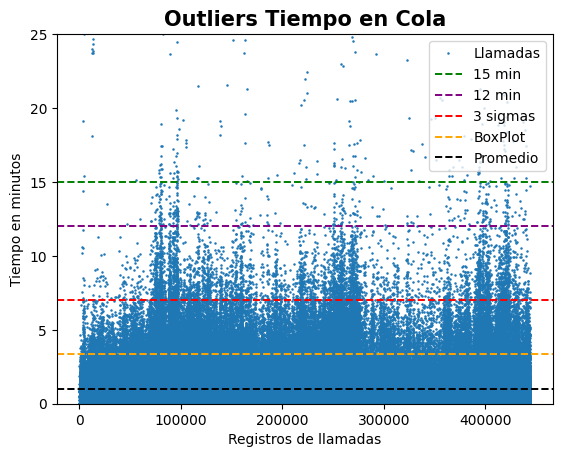

In [164]:
#Grafica de los datos sin outliers
plt.plot(calls['q_time']/60,'o', markersize = 0.8)
plt.axhline(y=15, color='green', linestyle='--', lw=1.4)
plt.axhline(y=12, color='purple', linestyle='--', lw=1.4)
plt.axhline(y=Max_q_s/60, color='r', linestyle='--', lw=1.4)
plt.axhline(y=Max_q_bp/60, color='orange', linestyle='--', lw=1.4)
plt.axhline(y=(calls['q_time'].mean())/60, color='black', linestyle='--', lw=1.4)
plt.ylim(0,25)
plt.legend(['Llamadas','15 min', '12 min', '3 sigmas', 'BoxPlot', 'Promedio'],loc="upper right" )
plt.ylabel('Tiempo en minutos')
plt.xlabel('Registros de llamadas')
plt.title('Outliers Tiempo en Cola',fontsize=15,fontweight='bold')
plt.show()

Se realizó el calculo de los limites de tiempo usando Boxplot y los 3 sigmas, sin embargo se consideró que algunos registros que excedian estos limites eran relevantes para el analisis. Teniendo en cuenta el contexto del origen de los datos se determinó un tiempo límite de 15 minutos. De acuerdo con esto, se eliminaron 216 registros (0.05%).

In [165]:
calls.drop(calls[(calls['q_time']<0)|(calls['q_time']>15*60)].index,inplace=True)

Quedaron 433929 registros

### Tiempo en Servicio

In [166]:
calls['ser_time'].describe()

count    433929.000000
mean        155.710010
std         265.281019
min           0.000000
25%          20.000000
50%          87.000000
75%         188.000000
max       36291.000000
Name: ser_time, dtype: float64

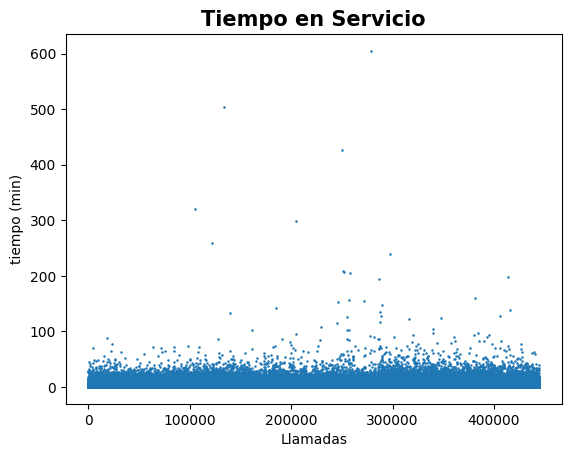

In [167]:
plt.plot(calls['ser_time']/60,'o',markersize=0.8)
plt.title('Tiempo en Servicio', fontweight = 'bold',fontsize=15)
plt.xlabel('Llamadas')
plt.ylabel('tiempo (min)')
plt.show()

#### Boxplot

Limites segun el Boxplot: tiempo maximo 440 segundos (7.33 minutos) y minimo 0 segundos <br>

In [168]:
#Calculo de bigotes
Q3 = float(calls['ser_time'].quantile(0.75))
Q1 = float(calls['ser_time'].quantile(0.25))
RIC = Q3 - Q1

Min_ser_bp = Q1 - 1.5*RIC
if Min_ser_bp < min(calls['ser_time']):
    Min_ser_bp = min(calls['ser_time'])
Max_ser_bp = Q3 + 1.5*RIC
if Max_ser_bp > max(calls['ser_time']):
    Max_ser_bp = max(calls['ser_time'])

Min_ser_bp, Max_ser_bp

(0, 440.0)

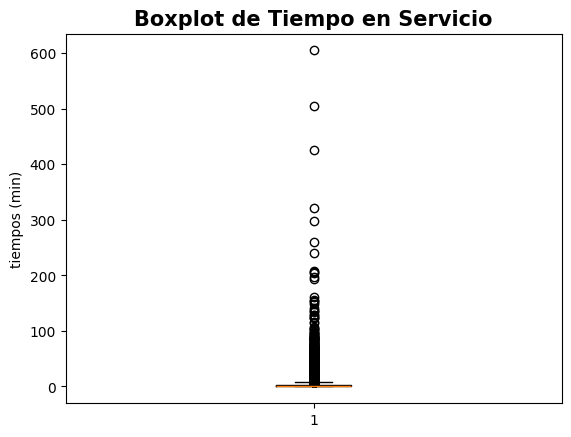

In [169]:
#Box plot completo
plt.boxplot(calls['ser_time']/60)
plt.title('Boxplot de Tiempo en Servicio',fontsize=15,fontweight='bold')
plt.ylabel('tiempos (min)')
plt.show()

(0.0, 8.066666666666668)

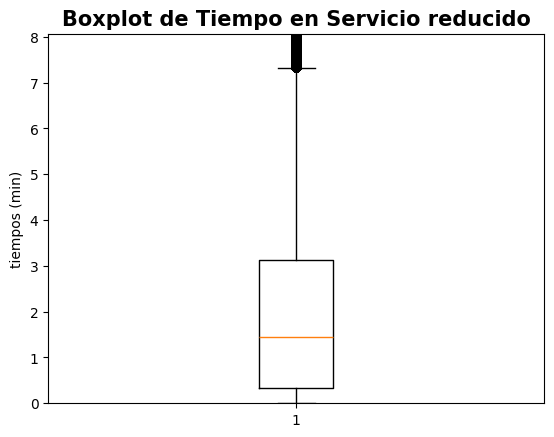

In [170]:
#Box plot enfocado en el box
plt.boxplot(calls['ser_time']/60)
plt.title('Boxplot de Tiempo en Servicio reducido',fontsize=15,fontweight='bold')
plt.ylabel('tiempos (min)')
plt.ylim(Min_ser_bp*0.9/60,Max_ser_bp*1.1/60)

#### Sigmas

Limites segun el metodo de los 3 sigmas: tiempo maximo 951.55 segundos (15.86 minutos) y minimo 0 segundos

In [171]:
Max_ser_s = calls['ser_time'].mean() + (3 * calls['ser_time'].std())
Min_ser_s = calls['ser_time'].mean() - (3 * calls['ser_time'].std())

if Min_ser_s < min(calls['ser_time']):
    Min_ser_s = min(calls['ser_time'])
if Max_ser_s > max(calls['ser_time']):
    Max_ser_s = max(calls['ser_time'])

Min_ser_s, Max_ser_s, Min_ser_s/60, Max_ser_s/60

(0, np.float64(951.5530668164857), 0.0, np.float64(15.859217780274763))

#### Conclusion

Text(0.5, 1.0, 'Outliers Tiempo en servicio')

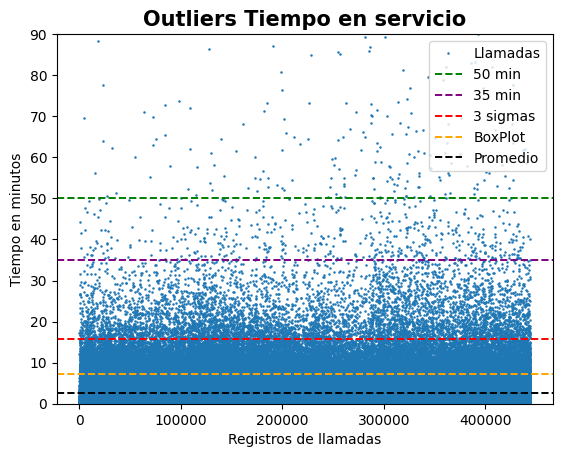

In [172]:
#Grafica de los datos
plt.plot(calls['ser_time']/60,'o', markersize = 0.8)
plt.axhline(y=50, color='green', linestyle='--', lw=1.4)
plt.axhline(y=35, color='purple', linestyle='--', lw=1.4)
plt.axhline(y=Max_ser_s/60, color='r', linestyle='--', lw=1.4)
plt.axhline(y=Max_ser_bp/60, color='orange', linestyle='--', lw=1.4) 
plt.axhline(y=calls['ser_time'].mean()/60, color='black', linestyle='--', lw=1.4)
plt.legend(['Llamadas','50 min', '35 min', '3 sigmas', 'BoxPlot', 'Promedio'],loc="upper right" )
plt.ylabel('Tiempo en minutos')
plt.xlabel('Registros de llamadas')
plt.ylim(Min_ser_s*0.9,90)
plt.title('Outliers Tiempo en servicio',fontsize=15,fontweight='bold')

Se eliminaron 230 registros (0.05%)

In [173]:
calls.drop(calls[(calls['ser_time']<0)|(calls['ser_time']>50*60)].index,inplace=True)

Quedaron 433699 registros

## Analisis de Variables

### Histogramas

(0.0, 3000.0)

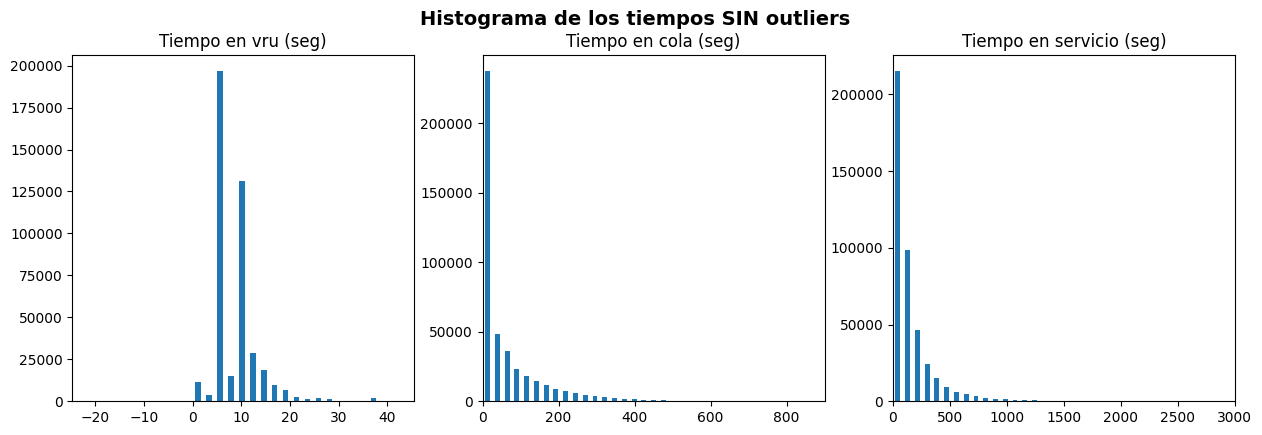

In [174]:
#Histograma de los tiempos
fig, ax = plt.subplots(1, 3,figsize = (15,4.5))
fig.suptitle("Histograma de los tiempos SIN outliers",fontsize=14, fontweight='bold')
ax[0].hist(calls['vru_time'],bins=20,rwidth=0.5)
ax[0].set_title('Tiempo en vru (seg)')
ax[0].set_xlim(Min_vru_s1,Max_vru_s1)
ax[1].hist(calls['q_time'],bins=35,rwidth=0.5)
ax[1].set_title('Tiempo en cola (seg)')
ax[1].set_xlim(0,15*60)
ax[2].hist(calls['ser_time'],bins=35,rwidth=0.5)
ax[2].set_title('Tiempo en servicio (seg)')
ax[2].set_xlim(0,50*60)

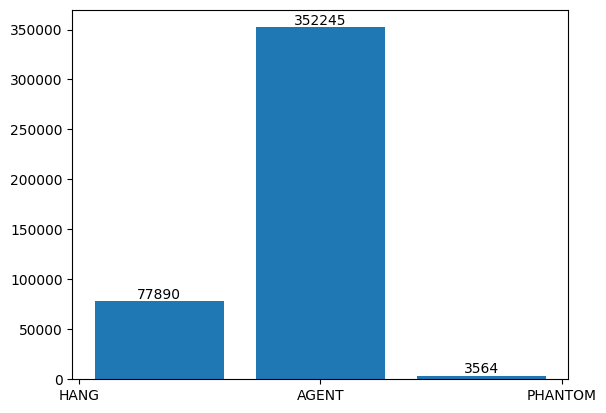

In [175]:
counts, bins, patches = plt.hist(calls['outcome'],bins=3, rwidth=0.8)

# Agregar los valores encima de cada barra
for count, bin in zip(counts, bins[:-1]):
    plt.text(bin + (bins[1] - bins[0]) / 2, count, str(int(count)), 
           ha='center', va='bottom', fontsize=10)
    
plt.show()

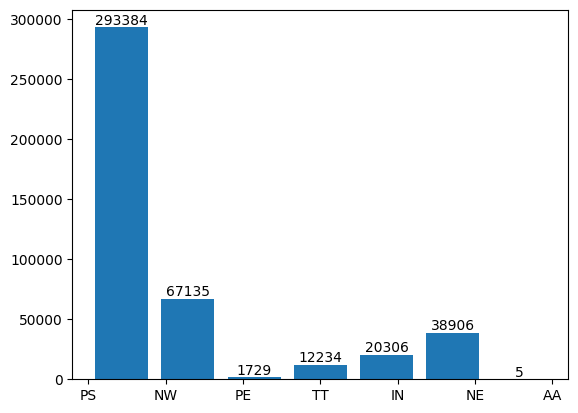

In [176]:
counts, bins, patches = plt.hist(calls['type'],bins=7, rwidth=0.8)

# Agregar los valores encima de cada barra
for count, bin in zip(counts, bins[:-1]):
    plt.text(bin + (bins[1] - bins[0]) / 2, count, str(int(count)), 
           ha='center', va='bottom', fontsize=10)
    
plt.show()

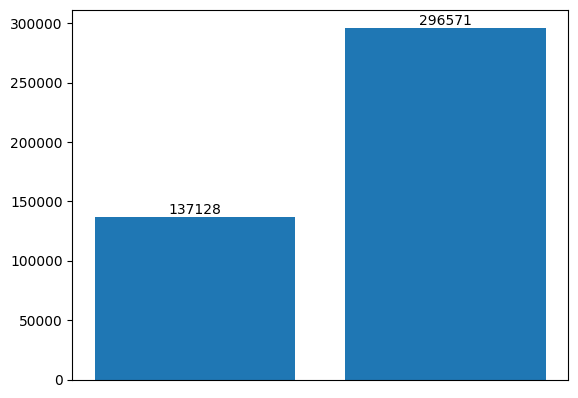

In [177]:
counts, bins, patches = plt.hist(calls['priority'],bins=2, rwidth=0.8)

# Agregar los valores encima de cada barra
for count, bin in zip(counts, bins[:-1]):
    plt.text(bin + (bins[1] - bins[0]) / 2, count, str(int(count)), 
           ha='center', va='bottom', fontsize=10)
    
plt.show()

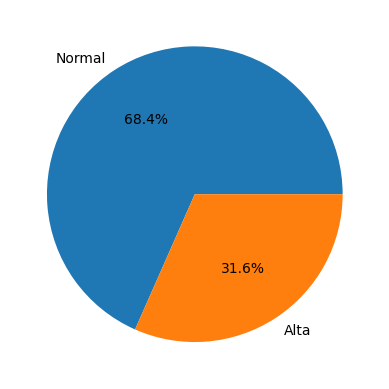

In [178]:
plt.pie(calls['priority'].value_counts(),labels=calls['priority'].value_counts().index,autopct='%1.1f%%')
plt.show()

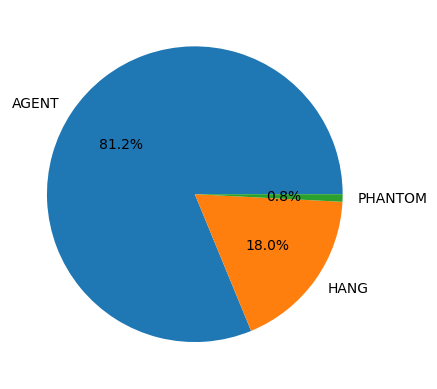

In [179]:
plt.pie(calls['outcome'].value_counts(),labels=calls['outcome'].value_counts().index,autopct='%1.1f%%')
plt.show()

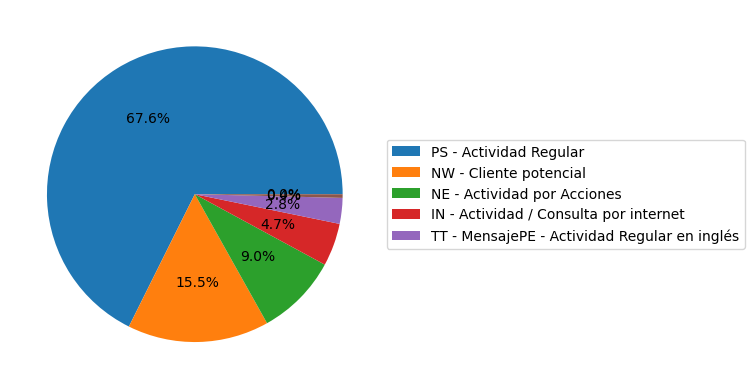

In [180]:
plt.pie(calls['type'].value_counts(),autopct='%1.1f%%')
plt.legend(['PS - Actividad Regular',
            'NW - Cliente potencial',
            'NE - Actividad por Acciones',
            'IN - Actividad / Consulta por internet',
            'TT - Mensaje'
            'PE - Actividad Regular en inglés',




],loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [181]:
calls['type'].value_counts()


type
PS    293384
NW     67135
NE     38906
IN     20306
TT     12234
PE      1729
AA         5
Name: count, dtype: int64

# Hay un tipo llamado AA que no esta en el doc y TT mal

Solo tiene vru_time

In [187]:
calls[calls['type']=='AA']

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
538,AA0214,12065,0.0,0,AA,1999-01-01,6:41:36,6:41:47,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
13233,AA0204,32649,0.0,0,AA,1999-01-13,4:12:26,4:13:04,38,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
109637,AA0209,36319,0.0,0,AA,1999-04-08,17:35:38,17:35:46,8,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,90
242738,AA0215,22424,0,0,AA,1999-07-22,14:06:09,14:06:42,33,00:00:00,00:00:00,0,HANG,00:00:00,00:00:00,0,NO_SERVER,181
320222,AA0206,50452,0,0,AA,1999-09-24,06:58:39,06:59:13,34,00:00:00,00:00:00,0,HANG,00:00:00,00:00:00,0,NO_SERVER,243
